In [1]:
import pandas as pd
import numpy as np

In [2]:
# Adding all of the file names into an array
files = ["ap_2010.csv", "class_size.csv", "demographics.csv", "graduation.csv", "hs_directory.csv", "math_test_results.csv", "sat_results.csv"]

# Creating a dictionary by reading all of the data files under data folder
data = {}
for f in files:
    d = pd.read_csv("data/{0}".format(f))
    data[f.replace(".csv","")] = d

In [3]:
# Printing first 5 lines of each DataFrame
for k,v in data.items():
    print("\n============\n" + k + "\n============")
    print(v.head())


math_test_results
      DBN Grade  Year      Category  Number Tested Mean Scale Score Level 1 #  \
0  01M015     3  2006  All Students             39              667         2   
1  01M015     3  2007  All Students             31              672         2   
2  01M015     3  2008  All Students             37              668         0   
3  01M015     3  2009  All Students             33              668         0   
4  01M015     3  2010  All Students             26              677         6   

  Level 1 % Level 2 # Level 2 % Level 3 # Level 3 % Level 4 # Level 4 %  \
0      5.1%        11     28.2%        20     51.3%         6     15.4%   
1      6.5%         3      9.7%        22       71%         4     12.9%   
2        0%         6     16.2%        29     78.4%         2      5.4%   
3        0%         4     12.1%        28     84.8%         1        3%   
4     23.1%        12     46.2%         6     23.1%         2      7.7%   

  Level 3+4 # Level 3+4 %  
0          26  

In [4]:
# Printing all of the columns
for k,v in data.items():
    print("\n============\n" + k + "\n============")
    print(v.shape)
    print(v.columns)    


math_test_results
(28478, 16)
Index([u'DBN', u'Grade', u'Year', u'Category', u'Number Tested',
       u'Mean Scale Score', u'Level 1 #', u'Level 1 %', u'Level 2 #',
       u'Level 2 %', u'Level 3 #', u'Level 3 %', u'Level 4 #', u'Level 4 %',
       u'Level 3+4 #', u'Level 3+4 %'],
      dtype='object')

sat_results
(478, 6)
Index([u'DBN', u'SCHOOL NAME', u'Num of SAT Test Takers',
       u'SAT Critical Reading Avg. Score', u'SAT Math Avg. Score',
       u'SAT Writing Avg. Score'],
      dtype='object')

demographics
(10075, 38)
Index([u'DBN', u'Name', u'schoolyear', u'fl_percent', u'frl_percent',
       u'total_enrollment', u'prek', u'k', u'grade1', u'grade2', u'grade3',
       u'grade4', u'grade5', u'grade6', u'grade7', u'grade8', u'grade9',
       u'grade10', u'grade11', u'grade12', u'ell_num', u'ell_percent',
       u'sped_num', u'sped_percent', u'ctt_num', u'selfcontained_num',
       u'asian_num', u'asian_per', u'black_num', u'black_per', u'hispanic_num',
       u'hispanic_per', 

Unique ID to join all of the tables is DBN field. But in `class_size` data set we don't have that field.

In [5]:
data['ap_2010']['DBN'].head()

0    01M448
1    01M450
2    01M515
3    01M539
4    02M296
Name: DBN, dtype: object

In [6]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


If we look at the `class_size` data, we see that `DBN` is actually a combination of `CSD` and `SCHOOL CODE`.

In [7]:
data['class_size']['DBN'] = data['class_size'].apply(lambda x: "{0:02d}{1}".format(x['CSD'],x['SCHOOL CODE']), axis=1)

In [8]:
# Below format helps us to display single digit numbers with leading zeros. 
# If we write 0:04, then the output will be 4 digit number leading with zeros: 0005
print("{0:02d}".format(5))

05


In [9]:
data['class_size'].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015


As we can see aboe, we see multiple rows for the same school in `class_size` DataFrame

In [10]:
# To have a primary index column between DataFrames we should rename the `dbn` column
data['hs_directory'].rename(columns={'dbn' : 'DBN'}, inplace=True)

In [11]:
data['hs_directory'].head(3)

,DBN,school_name,boro,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority02,priority03,priority04,priority05,priority06,priority07,priority08,priority09,priority10,Location 1
0,17K548,Brooklyn School for Music & Theatre,Brooklyn,K440,718-230-6250,718-230-6262,9,12,NaN,NaN,...,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"883 Classon Avenue\nBrooklyn, NY 11225\n(40.67..."
1,09X543,High School for Violin and Dance,Bronx,X400,718-842-0687,718-589-9849,9,12,NaN,NaN,...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,NaN,"1110 Boston Road\nBronx, NY 10456\n(40.8276026..."
2,09X327,Comprehensive Model School Project M.S. 327,Bronx,X240,718-294-8111,718-294-8109,6,12,NaN,NaN,...,Then to Bronx students or residents who attend...,Then to New York City residents who attend an ...,Then to Bronx students or residents,Then to New York City residents,NaN,NaN,NaN,NaN,NaN,"1501 Jerome Avenue\nBronx, NY 10452\n(40.84241..."


In [12]:
survey1 = pd.read_csv("data/survey_all.txt", delimiter="\t", encoding='windows-1252')
survey2 = pd.read_csv("data/survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey1['d75'], survey2['d75'] = False, True
survey = pd.concat([survey1, survey2], axis = 0)

In [13]:
survey.head()

,N_p,N_s,N_t,aca_p_11,aca_s_11,aca_t_11,aca_tot_11,bn,com_p_11,com_s_11,...,t_q8c_1,t_q8c_2,t_q8c_3,t_q8c_4,t_q9,t_q9_1,t_q9_2,t_q9_3,t_q9_4,t_q9_5
0,90.0,NaN,22.0,7.8,NaN,7.9,7.9,M015,7.6,NaN,...,29.0,67.0,5.0,0.0,NaN,5.0,14.0,52.0,24.0,5.0
1,161.0,NaN,34.0,7.8,NaN,9.1,8.4,M019,7.6,NaN,...,74.0,21.0,6.0,0.0,NaN,3.0,6.0,3.0,78.0,9.0
2,367.0,NaN,42.0,8.6,NaN,7.5,8.0,M020,8.3,NaN,...,33.0,35.0,20.0,13.0,NaN,3.0,5.0,16.0,70.0,5.0
3,151.0,145.0,29.0,8.5,7.4,7.8,7.9,M034,8.2,5.9,...,21.0,45.0,28.0,7.0,NaN,0.0,18.0,32.0,39.0,11.0
4,90.0,NaN,23.0,7.9,NaN,8.1,8.0,M063,7.9,NaN,...,59.0,36.0,5.0,0.0,NaN,10.0,5.0,10.0,60.0,15.0


In [14]:
survey['DBN'] = survey['dbn']
survey_fields = ["DBN", "rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_p_11", "com_p_11", "eng_p_11", "aca_p_11", "saf_t_11", "com_t_11", "eng_t_10", "aca_t_11", "saf_s_11", "com_s_11", "eng_s_11", "aca_s_11", "saf_tot_11", "com_tot_11", "eng_tot_11", "aca_tot_11"]
survey = survey.loc[:, survey_fields]
survey.shape

(1702, 23)

In [15]:
data['survey'] = survey

In [16]:
# Checking whether we have multiple rows with the same school (DBN)
temp = data['sat_results']['DBN'].value_counts()
temp[temp > 1]

Series([], Name: DBN, dtype: int64)

In [17]:
temp = data['class_size']['DBN'].value_counts()
temp[temp > 1].count()

1487

In [18]:
# An example school with multiple records in class_size DataFrame
data['class_size'][data['class_size']['DBN'] == '01M015']

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015
5,1,M,M015,P.S. 015 Roberto Clemente,02,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01M015
6,1,M,M015,P.S. 015 Roberto Clemente,03,GEN ED,-,-,-,12.0,1.0,12.0,12.0,12.0,ATS,NaN,01M015
7,1,M,M015,P.S. 015 Roberto Clemente,03,CTT,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01M015
8,1,M,M015,P.S. 015 Roberto Clemente,04,GEN ED,-,-,-,26.0,2.0,13.0,12.0,14.0,ATS,NaN,01M015
9,1,M,M015,P.S. 015 Roberto Clemente,05,GEN ED,-,-,-,27.0,1.0,27.0,27.0,27.0,ATS,NaN,01M015


It looks like `GRADE` and `PROGRAM TYPE` have multiple values for each school.

In [19]:
# When we try to see different values of `GRADE` column by running data['class_size']['GRADE'] we got an index error. 
# Then when we look at the columns we see that column grade is written with an additional space. 
data['class_size'].columns

Index([u'CSD', u'BOROUGH', u'SCHOOL CODE', u'SCHOOL NAME', u'GRADE ',
       u'PROGRAM TYPE', u'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       u'CORE COURSE (MS CORE and 9-12 ONLY)', u'SERVICE CATEGORY(K-9* ONLY)',
       u'NUMBER OF STUDENTS / SEATS FILLED', u'NUMBER OF SECTIONS',
       u'AVERAGE CLASS SIZE', u'SIZE OF SMALLEST CLASS',
       u'SIZE OF LARGEST CLASS', u'DATA SOURCE',
       u'SCHOOLWIDE PUPIL-TEACHER RATIO', u'DBN'],
      dtype='object')

In [20]:
# We can apply a lambda function, that trims/strips the additional spaces from all of the columns at once.
data['class_size'].rename(columns = lambda x: x.strip(), inplace=True)
data['class_size'].columns

Index([u'CSD', u'BOROUGH', u'SCHOOL CODE', u'SCHOOL NAME', u'GRADE',
       u'PROGRAM TYPE', u'CORE SUBJECT (MS CORE and 9-12 ONLY)',
       u'CORE COURSE (MS CORE and 9-12 ONLY)', u'SERVICE CATEGORY(K-9* ONLY)',
       u'NUMBER OF STUDENTS / SEATS FILLED', u'NUMBER OF SECTIONS',
       u'AVERAGE CLASS SIZE', u'SIZE OF SMALLEST CLASS',
       u'SIZE OF LARGEST CLASS', u'DATA SOURCE',
       u'SCHOOLWIDE PUPIL-TEACHER RATIO', u'DBN'],
      dtype='object')

In [21]:
data['class_size']['GRADE'].value_counts(normalize=True)

09-12      0.407395
MS Core    0.182264
0K-09      0.052972
0K         0.047346
01         0.045355
02         0.044666
03         0.043748
04         0.043633
05         0.041566
06         0.032380
07         0.029778
08         0.028132
09         0.000765
Name: GRADE, dtype: float64

In [22]:
data['class_size']['PROGRAM TYPE'].value_counts(normalize=True)

GEN ED     0.556704
CTT        0.285528
SPEC ED    0.139817
G&T        0.017951
Name: PROGRAM TYPE, dtype: float64

When we look at the percentage of the values occured in the DataFrame, we see that 40% of the rows have `09-12` `GRADE` type and 55% of the rows have `GEN ED` `PROGRAM TYPE`

So now we can;
- Only select values from class_size where the GRADE field is 09-12.
- Only select values from class_size where the PROGRAM TYPE field is GEN ED.
- Group the class_size dataset by DBN, and take the average of each column. Essentially, we’ll find the average  class_size values for each school.
- Reset the index, so DBN is added back in as a column.

In [23]:
class_size = data['class_size']
class_size = class_size[class_size['GRADE'] == '09-12']
class_size = class_size[class_size['PROGRAM TYPE'] == 'GEN ED']
class_size = class_size.groupby('DBN').agg(np.mean)

In [24]:
class_size.head()

,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
DBN,,,,,,,
01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [25]:
class_size.reset_index(inplace=True)
data['class_size'] = class_size
data['class_size'].head()

,DBN,CSD,NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,SCHOOLWIDE PUPIL-TEACHER RATIO
0,01M292,1,88.0000,4.000000,22.564286,18.50,26.571429,NaN
1,01M332,1,46.0000,2.000000,22.000000,21.00,23.500000,NaN
2,01M378,1,33.0000,1.000000,33.000000,33.00,33.000000,NaN
3,01M448,1,105.6875,4.750000,22.231250,18.25,27.062500,NaN
4,01M450,1,57.6000,2.733333,21.200000,19.40,22.866667,NaN


In [26]:
# When we check the number of duplicate rows after operations, we see that there are no schools with multiple records.
temp = data['class_size']['DBN'].value_counts()
temp[temp > 1].count()

0

In [27]:
# We also have duplicate rows in demographics DataFrame as well, but let's have look which causes duplicity
temp = data['demographics']['DBN'].value_counts()
temp[temp > 1].count()

1555

In [28]:
# As we see in here, for each year, we have a record for a school.
data['demographics'][data['demographics']['DBN'] == '01M015']

,DBN,Name,schoolyear,fl_percent,frl_percent,total_enrollment,prek,k,grade1,grade2,...,black_num,black_per,hispanic_num,hispanic_per,white_num,white_per,male_num,male_per,female_num,female_per
0,01M015,P.S. 015 ROBERTO CLEMENTE,20052006,89.4,NaN,281,15,36,40,33,...,74,26.3,189,67.3,5,1.8,158.0,56.2,123.0,43.8
1,01M015,P.S. 015 ROBERTO CLEMENTE,20062007,89.4,NaN,243,15,29,39,38,...,68,28.0,153,63.0,4,1.6,140.0,57.6,103.0,42.4
2,01M015,P.S. 015 ROBERTO CLEMENTE,20072008,89.4,NaN,261,18,43,39,36,...,77,29.5,157,60.2,7,2.7,143.0,54.8,118.0,45.2
3,01M015,P.S. 015 ROBERTO CLEMENTE,20082009,89.4,NaN,252,17,37,44,32,...,75,29.8,149,59.1,7,2.8,149.0,59.1,103.0,40.9
4,01M015,P.S. 015 ROBERTO CLEMENTE,20092010,,96.5,208,16,40,28,32,...,67,32.2,118,56.7,6,2.9,124.0,59.6,84.0,40.4
5,01M015,P.S. 015 ROBERTO CLEMENTE,20102011,,96.5,203,13,37,35,33,...,75,36.9,110,54.2,4,2.0,113.0,55.7,90.0,44.3
6,01M015,P.S. 015 ROBERTO CLEMENTE,20112012,NaN,89.4,189,13,31,35,28,...,63,33.3,109,57.7,4,2.1,97.0,51.3,92.0,48.7


In [29]:
# And yearly data is equally distributed
data['demographics']['schoolyear'].value_counts(normalize=True)

20112012    0.149777
20102011    0.148685
20092010    0.146402
20082009    0.143027
20072008    0.139950
20062007    0.137568
20052006    0.134591
Name: schoolyear, dtype: float64

In [30]:
data['demographics'] = data['demographics'][data['demographics']['schoolyear'] == 20112012]

In [31]:
# After we filter for only 1 year, we see no duplicates in our DataFrame
temp = data['demographics']['DBN'].value_counts()
temp[temp > 1].count()

0

In [32]:
# We also have Grade and Year breakdowns in this DataFrame
data['math_test_results'].head()

,DBN,Grade,Year,Category,Number Tested,Mean Scale Score,Level 1 #,Level 1 %,Level 2 #,Level 2 %,Level 3 #,Level 3 %,Level 4 #,Level 4 %,Level 3+4 #,Level 3+4 %
0,01M015,3,2006,All Students,39,667,2,5.1%,11,28.2%,20,51.3%,6,15.4%,26,66.7%
1,01M015,3,2007,All Students,31,672,2,6.5%,3,9.7%,22,71%,4,12.9%,26,83.9%
2,01M015,3,2008,All Students,37,668,0,0%,6,16.2%,29,78.4%,2,5.4%,31,83.8%
3,01M015,3,2009,All Students,33,668,0,0%,4,12.1%,28,84.8%,1,3%,29,87.9%
4,01M015,3,2010,All Students,26,677,6,23.1%,12,46.2%,6,23.1%,2,7.7%,8,30.8%


In [33]:
data['math_test_results'] = data['math_test_results'][(data['math_test_results']['Year'] == 2011) & 
                                                      (data['math_test_results']['Grade'] == '8')]

In [34]:
data['graduation'].head()

,Demographic,DBN,School Name,Cohort,Total Cohort,Total Grads - n,Total Grads - % of cohort,Total Regents - n,Total Regents - % of cohort,Total Regents - % of grads,...,Regents w/o Advanced - n,Regents w/o Advanced - % of cohort,Regents w/o Advanced - % of grads,Local - n,Local - % of cohort,Local - % of grads,Still Enrolled - n,Still Enrolled - % of cohort,Dropped Out - n,Dropped Out - % of cohort
0,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2003,5,s,s,s,s,s,...,s,s,s,s,s,s,s,s,s,s
1,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2004,55,37,67.3%,17,30.9%,45.9%,...,17,30.9%,45.9%,20,36.4%,54.1%,15,27.3%,3,5.5%
2,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2005,64,43,67.2%,27,42.2%,62.8%,...,27,42.2%,62.8%,16,25%,37.200000000000003%,9,14.1%,9,14.1%
3,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006,78,43,55.1%,36,46.2%,83.7%,...,36,46.2%,83.7%,7,9%,16.3%,16,20.5%,11,14.1%
4,Total Cohort,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL,2006 Aug,78,44,56.4%,37,47.4%,84.1%,...,37,47.4%,84.1%,7,9%,15.9%,15,19.2%,11,14.1%


In [35]:
data['graduation']['Demographic'].value_counts()

Total Cohort                   2493
English Proficient Students    2471
General Education Students     2471
Special Education Students     2471
Male                           2412
Black                          2403
Female                         2397
Hispanic                       2385
English Language Learners      2036
Asian                          1780
White                          1777
Name: Demographic, dtype: int64

In [36]:
data['graduation']['Cohort'].value_counts()

2006 Aug    4131
2006        4130
2005        3963
2004        3708
2003        3432
2002        3095
2001        2637
Name: Cohort, dtype: int64

In [37]:
data['graduation'] = data['graduation'][(data['graduation']['Cohort'] == "2006") & 
                                        (data['graduation']['Demographic'] == 'Total Cohort')]

In [38]:
# After we filter for only 1 year, we see no duplicates in our DataFrame
temp = data['graduation']['DBN'].value_counts()
temp[temp > 1].count()

0

## Computing variables

In [39]:
data['sat_results'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [40]:
cols = data['sat_results'].columns[3:]

data['sat_results'][cols] = data['sat_results'][cols].apply(pd.to_numeric, errors='coerce')

In [41]:
data['sat_results'].head(5)

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0
3,01M458,FORSYTH SATELLITE ACADEMY,7,414.0,401.0,359.0
4,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0


In [42]:
#data['sat_results']['sat_score2'] = data['sat_results'][cols[0]] + data['sat_results'][cols[1]] + data['sat_results'][cols[2]]
data['sat_results']['sat_score'] = data['sat_results'][cols].sum(axis=1)

In [43]:
data['hs_directory']['Location 1'][0].split("\n")[-1][1:-1].split(", ")

['40.67029890700047', '-73.96164787599963']

In [44]:
data['hs_directory']['lat'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1][1:-1].split(", ")[0])
data['hs_directory']['lon'] = data["hs_directory"]['Location 1'].apply(lambda x: x.split("\n")[-1][1:-1].split(", ")[1])

In [45]:
locations = ['lat', 'lon']

In [46]:
data['hs_directory'][locations].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
lat    435 non-null object
lon    435 non-null object
dtypes: object(2)
memory usage: 6.9+ KB


In [47]:
for c in locations:
    data['hs_directory'][c] = data['hs_directory'][c].apply(pd.to_numeric, errors='coerce')

In [48]:
data['hs_directory'][locations].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 2 columns):
lat    435 non-null float64
lon    435 non-null float64
dtypes: float64(2)
memory usage: 6.9 KB


## Combining the data sets

In [49]:
# Showing all of the data frame names
[k for k,v in data.items()]

['math_test_results',
 'sat_results',
 'demographics',
 'graduation',
 'hs_directory',
 'ap_2010',
 'survey',
 'class_size']

In [50]:
flat_data_names = [k for k,v in data.items()]
flat_data = [data[k] for k in flat_data_names]

In [51]:
full = flat_data[0]
for i, f in enumerate(flat_data[1:]):
    name = flat_data_names[i+1]
    print(name)
    print(len(f["DBN"]) - len(f["DBN"].unique()))
    join_type = "inner"
    if name in ["sat_results", "ap_2010", "graduation"]:
        join_type = "outer"
    if name not in ["math_test_results"]:
        full = full.merge(f, on="DBN", how=join_type)

full.shape

sat_results
0
demographics
0
graduation
0
hs_directory
0
ap_2010
1
survey
0
class_size
0


(396, 173)

In [52]:
cols = ['AP Test Takers ', 'Total Exams Taken', 'Number of Exams with scores 3 4 or 5']

In [53]:
full[cols].sample(10)

,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
342,19,19,s
294,34,64,s
134,NaN,NaN,NaN
16,NaN,NaN,NaN
320,324,424,136
59,NaN,NaN,NaN
337,733,1116,526
251,s,s,s
190,32,37,s
133,NaN,NaN,NaN


In [54]:
full[cols] = full[cols].apply(pd.to_numeric, errors='coerce')
full[cols] = full[cols].fillna(value=0)

In [55]:
full[cols].sample(10)

,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
356,0.0,0.0,0.0
76,40.0,43.0,0.0
46,0.0,0.0,0.0
342,19.0,19.0,0.0
181,15.0,15.0,0.0
107,70.0,84.0,32.0
362,279.0,408.0,175.0
361,396.0,687.0,206.0
36,24.0,24.0,0.0
231,52.0,59.0,0.0


In [56]:
full['school_dist'] = full['DBN'].apply(lambda x: x[:2])

In [57]:
full = full.fillna(full.mean())

## Computing correlations

In [58]:
full.corr()['sat_score'].sort_values(ascending=False)

sat_score                               1.000000e+00
SAT Writing Avg. Score                  4.728543e-01
SAT Critical Reading Avg. Score         4.723992e-01
SAT Math Avg. Score                     4.656125e-01
AP Test Takers                          3.699774e-01
SIZE OF LARGEST CLASS                   3.591425e-01
Total Exams Taken                       3.535441e-01
N_s                                     3.421004e-01
N_p                                     3.304990e-01
Number of Exams with scores 3 4 or 5    3.285992e-01
AVERAGE CLASS SIZE                      3.125456e-01
total_enrollment                        3.073292e-01
female_num                              3.061122e-01
NUMBER OF STUDENTS / SEATS FILLED       2.975974e-01
asian_num                               2.974188e-01
white_per                               2.971668e-01
total_students                          2.913363e-01
N_t                                     2.900925e-01
male_num                                2.8889

- Total enrollment correlates strongly with sat_score, which is surprising, because you’d think smaller schools, which focused more on the student, would have higher scores.
- The percentage of females at a school (female_per) correlates positively with SAT score, whereas the percentage of males (male_per) correlates negatively.
- None of the survey responses correlate highly with SAT scores.
- There is a significant racial inequality in SAT scores (white_per, asian_per, black_per, hispanic_per).
ell_percent correlates strongly negatively with SAT scores.

## Exploring enrollment and SAT scores

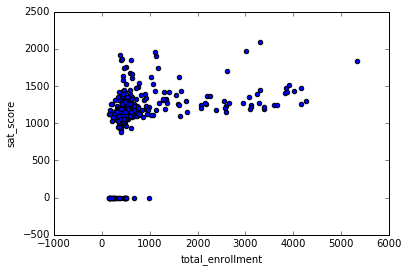

In [59]:
%matplotlib inline

full.plot.scatter(x='total_enrollment', y='sat_score')

In [60]:
full[(full["total_enrollment"] < 1000) & (full["sat_score"] < 1000)]["School Name"]

11                                       NaN
22                                       NaN
23                                       NaN
26                                       NaN
34     INTERNATIONAL SCHOOL FOR LIBERAL ARTS
42                                       NaN
59                                       NaN
60                                       NaN
72                                       NaN
77                                       NaN
96                                       NaN
97                                       NaN
98                                       NaN
108                                      NaN
109                                      NaN
110                                      NaN
132                                      NaN
133                                      NaN
134                                      NaN
148                                      NaN
155      INTERNATIONAL COMMUNITY HIGH SCHOOL
171                                      NaN
182       

## Exploring English language learners and SAT scores

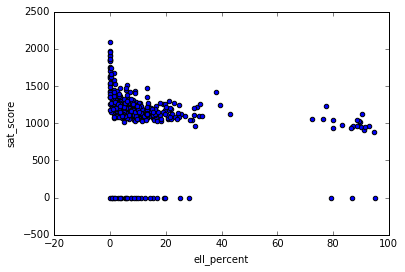

In [62]:
full.plot.scatter(x='ell_percent', y='sat_score')

## Correlating survey scores and SAT scores

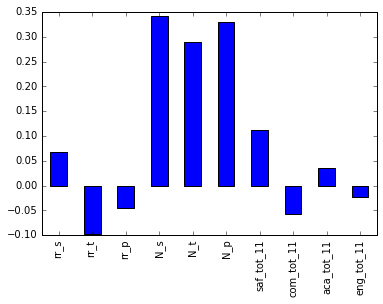

In [63]:
full.corr()["sat_score"][["rr_s", "rr_t", "rr_p", "N_s", "N_t", "N_p", "saf_tot_11", "com_tot_11", "aca_tot_11", "eng_tot_11"]].plot.bar()

## Exploring race and SAT scores

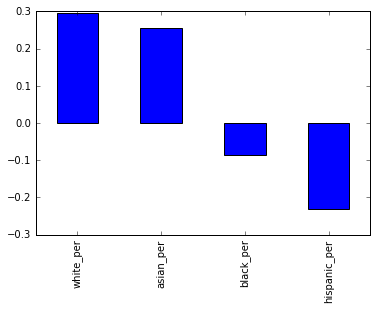

In [64]:
full.corr()["sat_score"][["white_per", "asian_per", "black_per", "hispanic_per"]].plot.bar()

## Gender differences in SAT scores

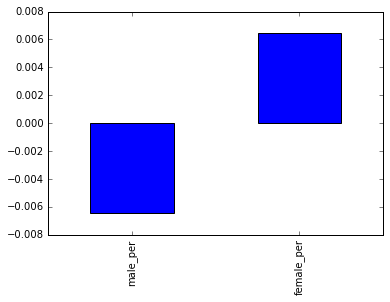

In [66]:
full.corr()['sat_score'][['male_per','female_per']].plot.bar()

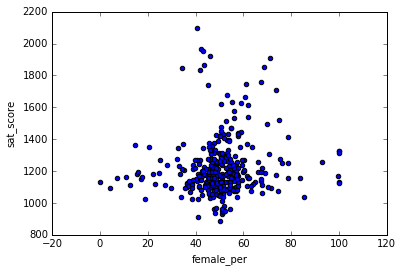

In [68]:
full[full['sat_score'] > 0].plot.scatter(x='female_per',y='sat_score')

In [69]:
full[(full['sat_score'] > 1400) & (full['female_per'] > 65)]['school_name']

3               Professional Performing Arts High School
83                        Bard High School Early College
103                        Eleanor Roosevelt High School
117                         Talent Unlimited High School
136    Fiorello H. LaGuardia High School of Music & A...
321                          Townsend Harris High School
352         Frank Sinatra School of the Arts High School
Name: school_name, dtype: object

## AP scores

In [72]:
full['ap_avg'] = full['AP Test Takers '] / full['total_enrollment']

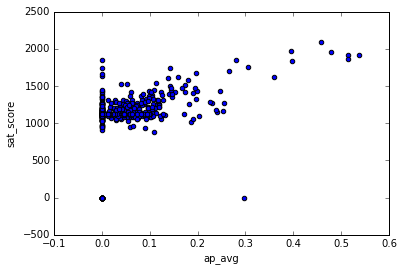

In [73]:
full.plot.scatter(x='ap_avg', y='sat_score')